In [42]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [43]:
red_theta = 0.75
blue_theta = 0.6
other_theta = 0.65
thetas = [red_theta, blue_theta, other_theta]

# Uniform Distribution for each prior
alpha = [1, 1, 1]
beta = [1, 1, 1]

In [45]:
num_trials = 500

for _ in range(num_trials):
    options = [
        stats.beta(a=alpha[0], b=beta[0]).rvs(),
        stats.beta(a=alpha[1], b=beta[1]).rvs(),
        stats.beta(a=alpha[2], b=beta[2]).rvs(),
    ]
    
    best_option = np.argmax(options)
    
    success = stats.binom(n=1, p=thetas[best_option]).rvs()
    alpha[best_option] += success
    beta[best_option] += 1 - success

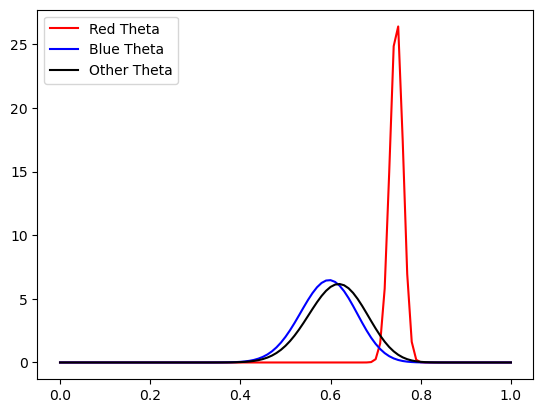

In [46]:
x_range = np.array(range(101)) / 100
red_y = stats.beta(a=alpha[0], b=beta[0]).pdf(x_range)
blue_y = stats.beta(a=alpha[1], b=beta[1]).pdf(x_range)
other_y = stats.beta(a=alpha[2], b=beta[2]).pdf(x_range)

plt.plot(x_range, red_y, label="Red Theta", color="red")
plt.plot(x_range, blue_y, label="Blue Theta", color="blue")
plt.plot(x_range, other_y, label="Other Theta", color="black")
plt.legend()

For this question, our data is the amount of successes and trials experienced by each "slot machine", represented by the three $
\theta$. We update the posterior distribution for each of the $\theta$ by updating their parameters, $x_j + \alpha_j$ and $n_j - x_j + \beta_j$; in particular, for each trial, I update the number of successes seen by that particular machine ($x_j$) and the number of trials ($n_j$) completed by that slot machine. 

I decide which machine to try out by sampling from the posterior distribution of the machines and picking the highest sampled value. As I pick one machine more over another, I get more data about the machine, allowing me to be more confident about the distribution of that machine's $\theta$.